In [1]:
# import requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import tensorflow as tf

from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.applications import EfficientNetB0


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Capstone/


/content/drive/MyDrive/Capstone


In [4]:
#Use a ranodm seed to nesure that the data is split hte same way each time
np.random.seed(42)

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # reserve 20% of images for validation

# Use flow_from_directory to load training images
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Capstone/rotated_and_flipped',  # path to the parent directory
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # specify this is for training data
)

# Use flow_from_directory to load validation images
val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Capstone/rotated_and_flipped',  # path to the parent directory
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # specify this is for validation data
)


Found 18632 images belonging to 8 classes.
Found 4656 images belonging to 8 classes.


In [ ]:
#Use google's EfficientNet trained CNN as a base model.

# Load pre-trained EfficientNetB0, without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# You can add custom layers on top of the base model
model_google = tf.keras.Sequential([
    base_model,
    Flatten(),
    tf.keras.layers.Dense(8, activation='softmax')
])

# Compile the model
model_google.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model
model_google_history = model_google.fit(train_data, batch_size=32, validation_data=val_data, epochs=30, callbacks=[early_stopping])


16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/30
583/583 [==============================] - 13352s 23s/step - loss: 1.8280 - accuracy: 0.4428 - val_loss: 4.7489 - val_accuracy: 0.1293
Epoch 2/30
583/583 [==============================] - 69s 119ms/step - loss: 1.2534 - accuracy: 0.5527 - val_loss: 2.8208 - val_accuracy: 0.1418
Epoch 3/30
583/583 [==============================] - 70s 119ms/step - loss: 1.0132 - accuracy: 0.6292 - val_loss: 4.2983 - val_accuracy: 0.1510
Epoch 4/30
583/583 [==============================] - 69s 118ms/step - loss: 0.8558 - accuracy: 0.6889 - val_loss: 3.5264 - val_accuracy: 0.1293
Epoch 5/30
583/583 [==============================] - 69s 118ms/step - loss: 0.7153 - accuracy: 0.7417 - val_loss: 5.4365 - val_accuracy: 0.1516
Epoch 6/30
583/583 [==============================] - 70s 120ms/step - loss: 0.6064 - accuracy: 0.7839 - val_loss: 6.0806 - val_accuracy: 0.1282
Epoch 7/30
583/583 [==============================] - 69s 118ms/

In [ ]:
# Save weights to a HDF5 file
model_google.save_weights('model_google_weights.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_google_weights.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_google_weights.h5'

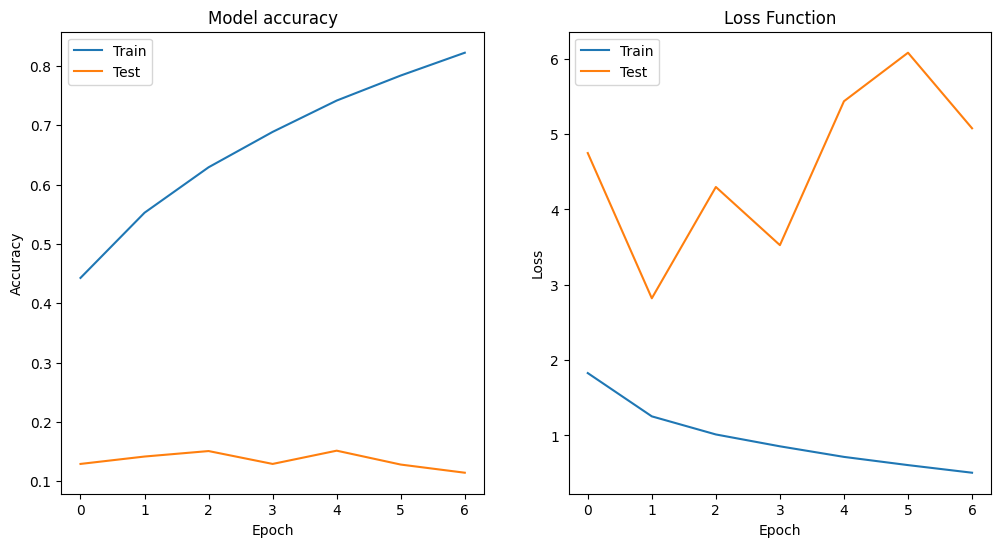

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_google_history.history['accuracy'])
axs[0].plot(model_google_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_google_history.history['loss'])
axs[1].plot(model_google_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_layerDeep_1 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [ ]:
# Compile the model
model_layerDeep_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_layerDeep_1_1history = model_layerDeep_1.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 70s 112ms/step - loss: 1.7927 - accuracy: 0.2843 - val_loss: 1.5806 - val_accuracy: 0.3780
Epoch 2/30
583/583 [==============================] - 64s 111ms/step - loss: 1.4899 - accuracy: 0.3971 - val_loss: 1.4710 - val_accuracy: 0.4167
Epoch 3/30
583/583 [==============================] - 66s 113ms/step - loss: 1.3900 - accuracy: 0.4412 - val_loss: 1.4903 - val_accuracy: 0.4104
Epoch 4/30
583/583 [==============================] - 65s 111ms/step - loss: 1.3476 - accuracy: 0.4572 - val_loss: 1.3719 - val_accuracy: 0.4538
Epoch 5/30
583/583 [==============================] - 64s 110ms/step - loss: 1.3072 - accuracy: 0.4688 - val_loss: 1.3626 - val_accuracy: 0.4568
Epoch 6/30
583/583 [==============================] - 65s 111ms/step - loss: 1.2732 - accuracy: 0.4850 - val_loss: 1.3942 - val_accuracy: 0.4422
Epoch 7/30
583/583 [==============================] - 65s 111ms/step - loss: 1.2500 - accuracy: 0.4936 - val_loss: 1.3663 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_layerDeep_1.save_weights('model_layerDeep_1.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_layerDeep_1.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_1.h5'

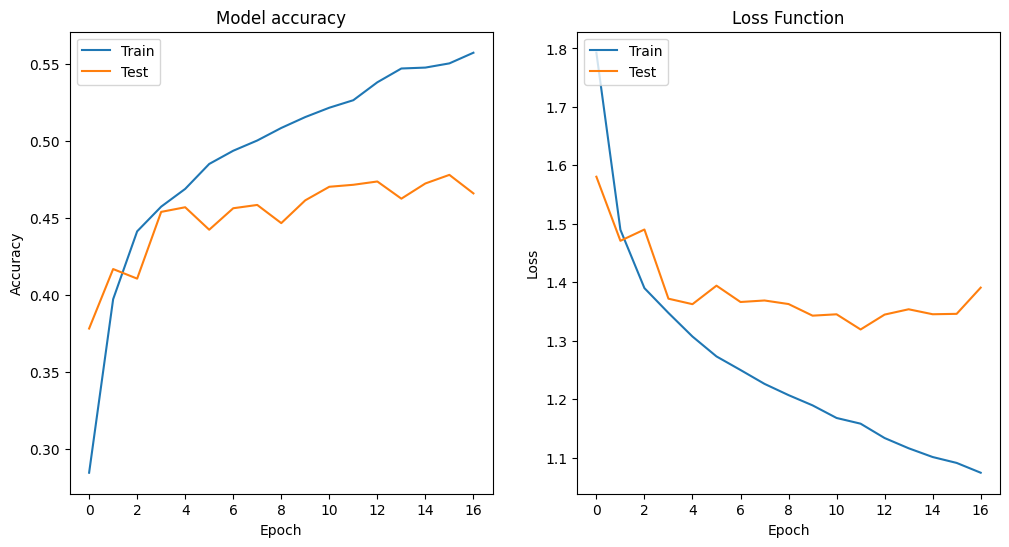

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_layerDeep_1_1history.history['accuracy'])
axs[0].plot(model_layerDeep_1_1history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_layerDeep_1_1history.history['loss'])
axs[1].plot(model_layerDeep_1_1history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_layerDeep_2 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [ ]:
# Compile the model
model_layerDeep_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_layerDeep_2_history = model_layerDeep_2.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 68s 113ms/step - loss: 1.8180 - accuracy: 0.2766 - val_loss: 1.6133 - val_accuracy: 0.3664
Epoch 2/30
583/583 [==============================] - 65s 112ms/step - loss: 1.4994 - accuracy: 0.4087 - val_loss: 1.5011 - val_accuracy: 0.3971
Epoch 3/30
583/583 [==============================] - 64s 110ms/step - loss: 1.4135 - accuracy: 0.4372 - val_loss: 1.4090 - val_accuracy: 0.4392
Epoch 4/30
583/583 [==============================] - 65s 112ms/step - loss: 1.3658 - accuracy: 0.4515 - val_loss: 1.4130 - val_accuracy: 0.4308
Epoch 5/30
583/583 [==============================] - 65s 111ms/step - loss: 1.3226 - accuracy: 0.4703 - val_loss: 1.3785 - val_accuracy: 0.4431
Epoch 6/30
583/583 [==============================] - 66s 114ms/step - loss: 1.2959 - accuracy: 0.4795 - val_loss: 1.3502 - val_accuracy: 0.4519
Epoch 7/30
583/583 [==============================] - 66s 112ms/step - loss: 1.2611 - accuracy: 0.4919 - val_loss: 1.3496 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_layerDeep_2.save_weights('model_layerDeep_2.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_layerDeep_2.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_2.h5'

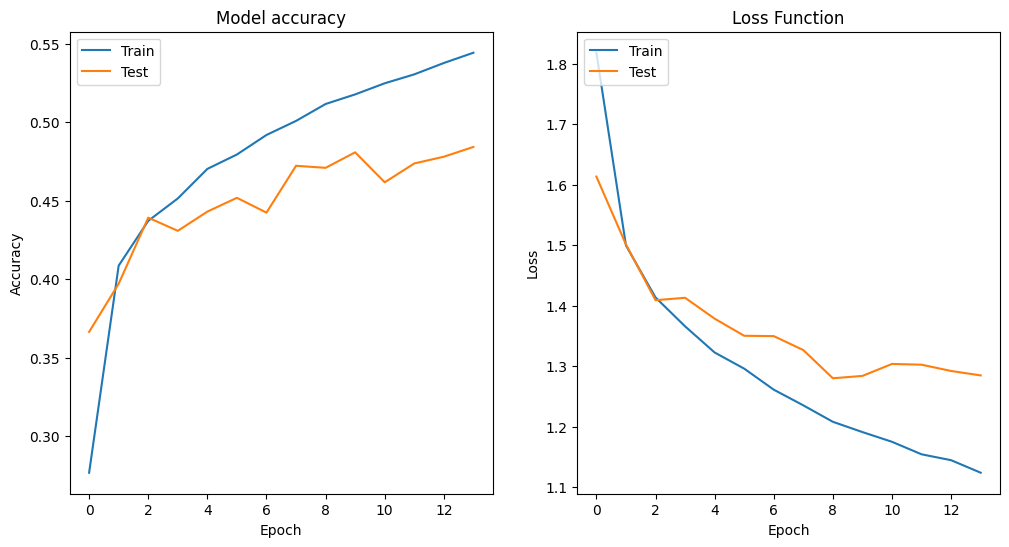

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_layerDeep_2_history.history['accuracy'])
axs[0].plot(model_layerDeep_2_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_layerDeep_2_history.history['loss'])
axs[1].plot(model_layerDeep_2_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_layerDeep_3 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [ ]:
# Compile the model
model_layerDeep_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_layerDeep_3_history = model_layerDeep_3.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 67s 112ms/step - loss: 1.7440 - accuracy: 0.3112 - val_loss: 1.5541 - val_accuracy: 0.3956
Epoch 2/30
583/583 [==============================] - 67s 114ms/step - loss: 1.4827 - accuracy: 0.4131 - val_loss: 1.4819 - val_accuracy: 0.4089
Epoch 3/30
583/583 [==============================] - 66s 114ms/step - loss: 1.3805 - accuracy: 0.4513 - val_loss: 1.4085 - val_accuracy: 0.4332
Epoch 4/30
583/583 [==============================] - 64s 110ms/step - loss: 1.3104 - accuracy: 0.4826 - val_loss: 1.3923 - val_accuracy: 0.4581
Epoch 5/30
583/583 [==============================] - 64s 111ms/step - loss: 1.2513 - accuracy: 0.5037 - val_loss: 1.4245 - val_accuracy: 0.4401
Epoch 6/30
583/583 [==============================] - 66s 113ms/step - loss: 1.2132 - accuracy: 0.5185 - val_loss: 1.3656 - val_accuracy: 0.4476
Epoch 7/30
583/583 [==============================] - 65s 111ms/step - loss: 1.1610 - accuracy: 0.5370 - val_loss: 1.3748 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_layerDeep_3.save_weights('model_layerDeep_3.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_layerDeep_3.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_3.h5'

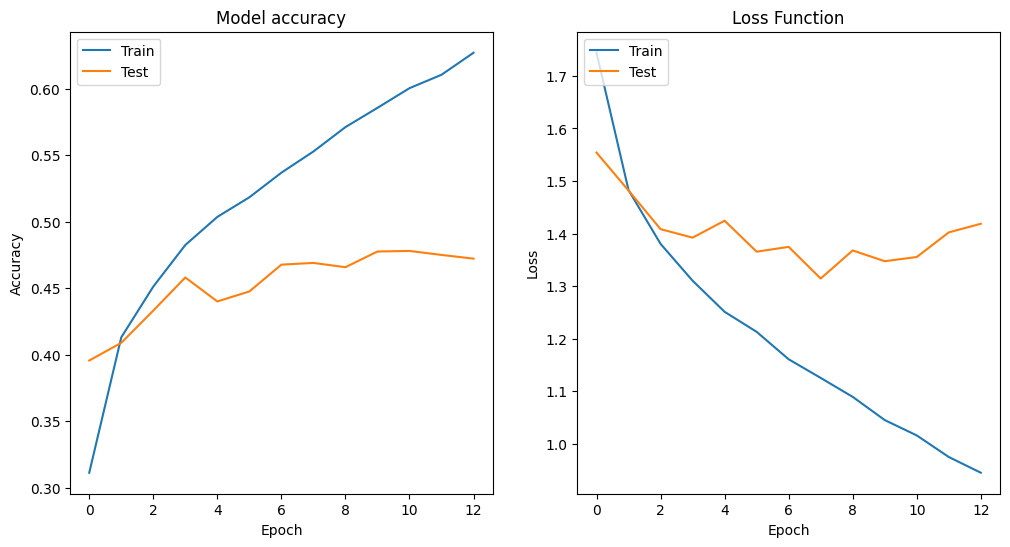

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_layerDeep_3_history.history['accuracy'])
axs[0].plot(model_layerDeep_3_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_layerDeep_3_history.history['loss'])
axs[1].plot(model_layerDeep_3_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_layerDeep_4 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [ ]:
# Compile the model
model_layerDeep_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_layerDeep_4_history = model_layerDeep_4.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 66s 110ms/step - loss: 1.7495 - accuracy: 0.3171 - val_loss: 1.6546 - val_accuracy: 0.3417
Epoch 2/30
583/583 [==============================] - 65s 111ms/step - loss: 1.4977 - accuracy: 0.4089 - val_loss: 1.5046 - val_accuracy: 0.4025
Epoch 3/30
583/583 [==============================] - 66s 113ms/step - loss: 1.3902 - accuracy: 0.4464 - val_loss: 1.5184 - val_accuracy: 0.4076
Epoch 4/30
583/583 [==============================] - 65s 112ms/step - loss: 1.3154 - accuracy: 0.4738 - val_loss: 1.4221 - val_accuracy: 0.4261
Epoch 5/30
583/583 [==============================] - 65s 112ms/step - loss: 1.2518 - accuracy: 0.4994 - val_loss: 1.3898 - val_accuracy: 0.4366
Epoch 6/30
583/583 [==============================] - 65s 112ms/step - loss: 1.1963 - accuracy: 0.5216 - val_loss: 1.3464 - val_accuracy: 0.4680
Epoch 7/30
583/583 [==============================] - 64s 110ms/step - loss: 1.1383 - accuracy: 0.5443 - val_loss: 1.3734 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_layerDeep_4.save_weights('model_layerDeep_4.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_layerDeep_4.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_4.h5'

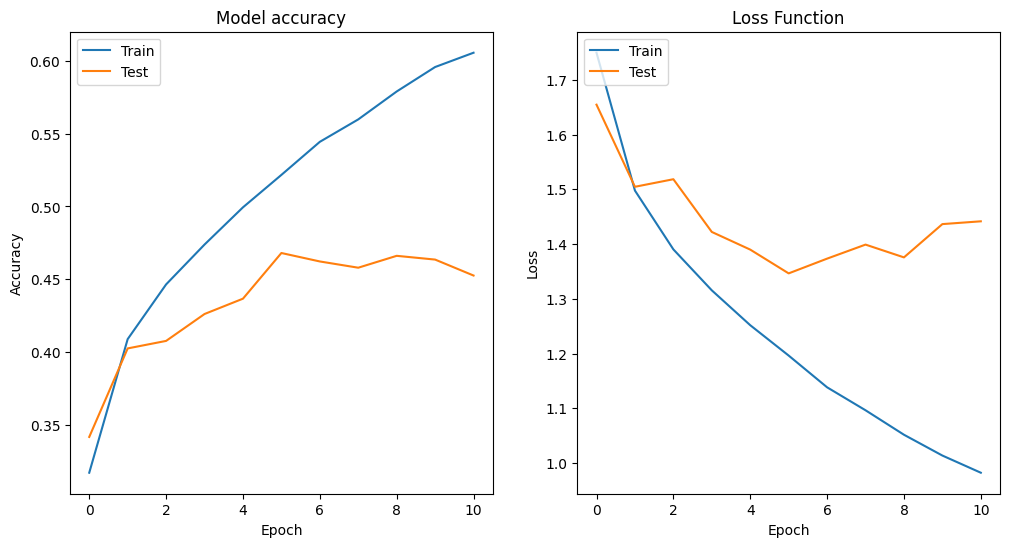

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_layerDeep_4_history.history['accuracy'])
axs[0].plot(model_layerDeep_4_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_layerDeep_4_history.history['loss'])
axs[1].plot(model_layerDeep_4_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_layerDeep_5 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [ ]:
# Compile the model
model_layerDeep_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_layerDeep_5_history = model_layerDeep_5.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 67s 113ms/step - loss: 1.6754 - accuracy: 0.3466 - val_loss: 1.5237 - val_accuracy: 0.3997
Epoch 2/30
583/583 [==============================] - 64s 110ms/step - loss: 1.3964 - accuracy: 0.4570 - val_loss: 1.4559 - val_accuracy: 0.4218
Epoch 3/30
583/583 [==============================] - 65s 111ms/step - loss: 1.2584 - accuracy: 0.5145 - val_loss: 1.5415 - val_accuracy: 0.4130
Epoch 4/30
583/583 [==============================] - 64s 110ms/step - loss: 1.1419 - accuracy: 0.5608 - val_loss: 1.4078 - val_accuracy: 0.4461
Epoch 5/30
583/583 [==============================] - 66s 113ms/step - loss: 1.0246 - accuracy: 0.6126 - val_loss: 1.4343 - val_accuracy: 0.4603
Epoch 6/30
583/583 [==============================] - 64s 111ms/step - loss: 0.9106 - accuracy: 0.6594 - val_loss: 1.4927 - val_accuracy: 0.4671
Epoch 7/30
583/583 [==============================] - 64s 109ms/step - loss: 0.8089 - accuracy: 0.7003 - val_loss: 1.5646 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_layerDeep_5.save_weights('model_layerDeep_5.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_layerDeep_5.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_5.h5'

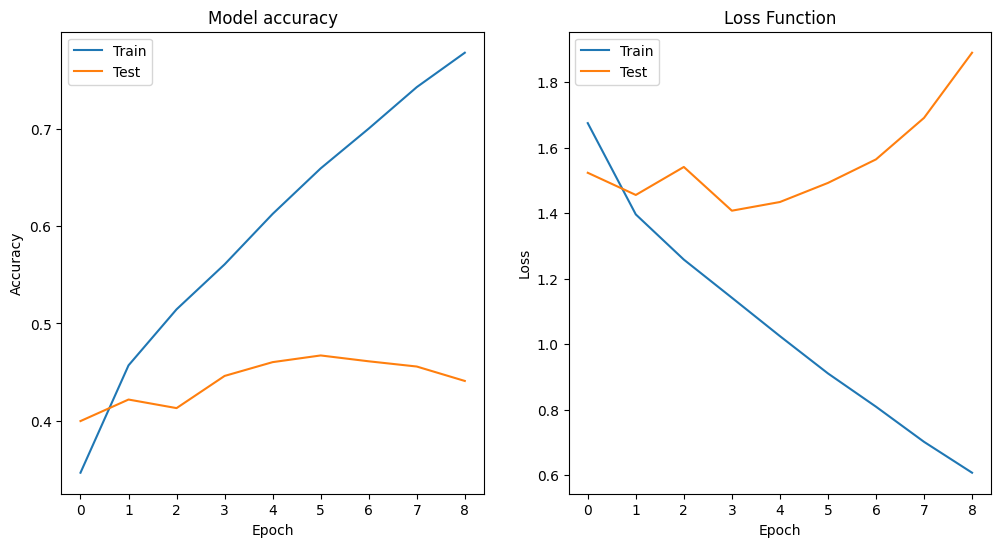

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_layerDeep_5_history.history['accuracy'])
axs[0].plot(model_layerDeep_5_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_layerDeep_5_history.history['loss'])
axs[1].plot(model_layerDeep_5_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_layerDeep_6 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])



In [ ]:
# Compile the model
model_layerDeep_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_layerDeep_6_history = model_layerDeep_6.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 66s 111ms/step - loss: 1.7519 - accuracy: 0.3198 - val_loss: 1.6322 - val_accuracy: 0.3550
Epoch 2/30
583/583 [==============================] - 65s 111ms/step - loss: 1.4789 - accuracy: 0.4276 - val_loss: 1.5029 - val_accuracy: 0.4051
Epoch 3/30
583/583 [==============================] - 63s 109ms/step - loss: 1.3476 - accuracy: 0.4771 - val_loss: 1.5053 - val_accuracy: 0.4087
Epoch 4/30
583/583 [==============================] - 64s 110ms/step - loss: 1.2437 - accuracy: 0.5141 - val_loss: 1.5186 - val_accuracy: 0.4098
Epoch 5/30
583/583 [==============================] - 64s 110ms/step - loss: 1.1482 - accuracy: 0.5593 - val_loss: 1.4981 - val_accuracy: 0.4261
Epoch 6/30
583/583 [==============================] - 66s 113ms/step - loss: 1.0587 - accuracy: 0.5962 - val_loss: 1.5852 - val_accuracy: 0.4201
Epoch 7/30
583/583 [==============================] - 64s 110ms/step - loss: 0.9629 - accuracy: 0.6300 - val_loss: 1.6988 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_layerDeep_6.save_weights('model_layerDeep_6.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_layerDeep_6.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_6.h5'

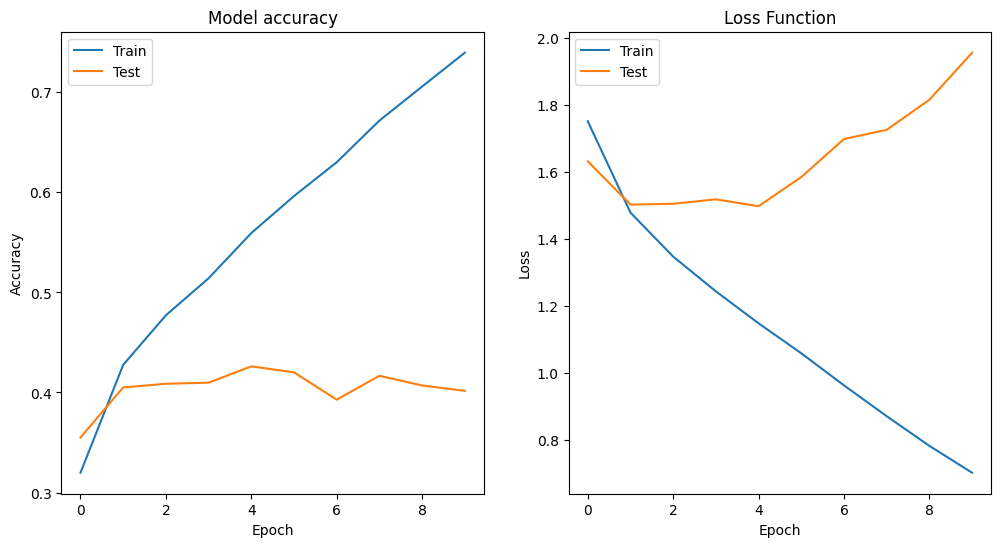

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_layerDeep_6_history.history['accuracy'])
axs[0].plot(model_layerDeep_6_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_layerDeep_6_history.history['loss'])
axs[1].plot(model_layerDeep_6_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_filterDeep_1 = Sequential([
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

In [ ]:
# Compile the model
model_filterDeep_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_filterDeep_1_history = model_filterDeep_1.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 66s 112ms/step - loss: 2.1408 - accuracy: 0.1417 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/30
583/583 [==============================] - 65s 112ms/step - loss: 2.0796 - accuracy: 0.1222 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/30
583/583 [==============================] - 65s 111ms/step - loss: 2.0796 - accuracy: 0.1217 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/30
583/583 [==============================] - 66s 113ms/step - loss: 2.0796 - accuracy: 0.1203 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/30
583/583 [==============================] - 64s 110ms/step - loss: 2.0796 - accuracy: 0.1222 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/30
583/583 [==============================] - 64s 110ms/step - loss: 2.0796 - accuracy: 0.1241 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/30
583/583 [==============================] - 66s 113ms/step - loss: 2.0796 - accuracy: 0.1186 - val_loss: 2.0795 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_filterDeep_1.save_weights('model_filterDeep_1.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_filterDeep_1.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_1.h5'

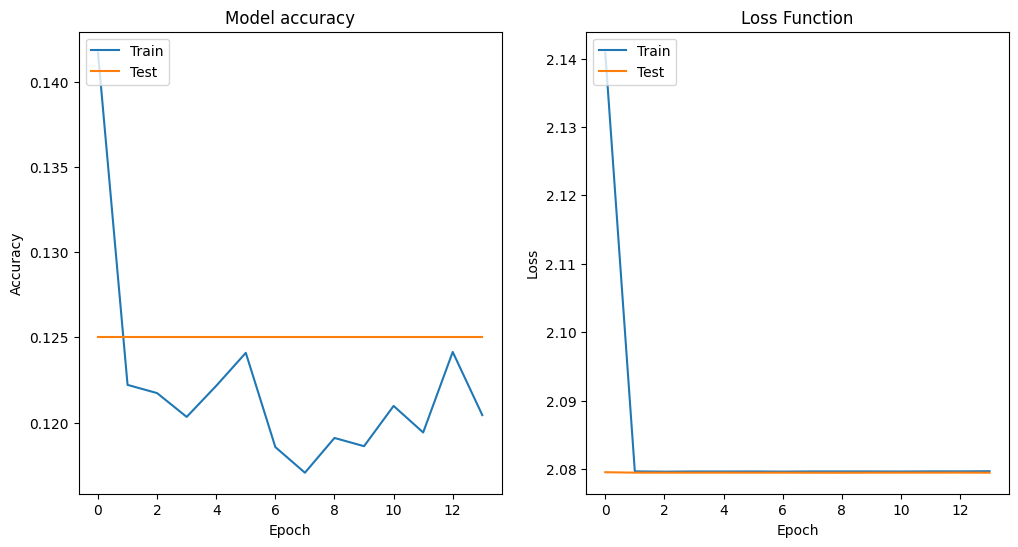

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_filterDeep_1_history.history['accuracy'])
axs[0].plot(model_filterDeep_1_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_filterDeep_1_history.history['loss'])
axs[1].plot(model_filterDeep_1_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_filterDeep_2 = Sequential([
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

In [ ]:
# Compile the model
model_filterDeep_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_filterDeep_2_history = model_filterDeep_2.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 67s 112ms/step - loss: 1.7453 - accuracy: 0.3090 - val_loss: 1.5566 - val_accuracy: 0.3827
Epoch 2/30
583/583 [==============================] - 66s 113ms/step - loss: 1.4936 - accuracy: 0.4060 - val_loss: 1.4969 - val_accuracy: 0.4119
Epoch 3/30
583/583 [==============================] - 65s 111ms/step - loss: 1.3922 - accuracy: 0.4416 - val_loss: 1.4479 - val_accuracy: 0.4330
Epoch 4/30
583/583 [==============================] - 64s 110ms/step - loss: 1.3174 - accuracy: 0.4755 - val_loss: 1.4263 - val_accuracy: 0.4351
Epoch 5/30
583/583 [==============================] - 66s 113ms/step - loss: 1.2538 - accuracy: 0.4986 - val_loss: 1.3809 - val_accuracy: 0.4500
Epoch 6/30
583/583 [==============================] - 65s 112ms/step - loss: 1.1880 - accuracy: 0.5293 - val_loss: 1.4222 - val_accuracy: 0.4422
Epoch 7/30
583/583 [==============================] - 65s 112ms/step - loss: 1.1342 - accuracy: 0.5472 - val_loss: 1.3878 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_filterDeep_2.save_weights('model_filterDeep_2.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_filterDeep_2.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_2.h5'

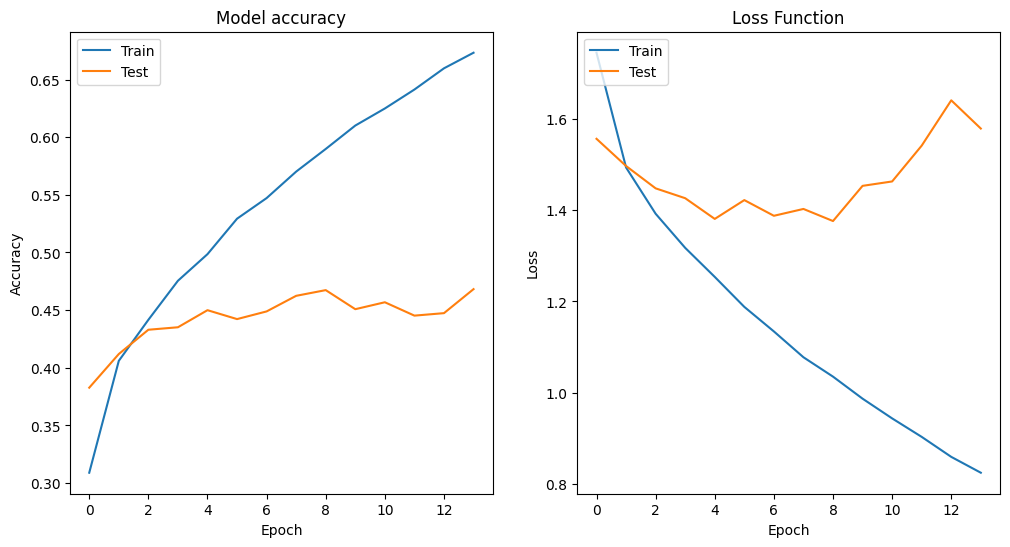

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_filterDeep_2_history.history['accuracy'])
axs[0].plot(model_filterDeep_2_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_filterDeep_2_history.history['loss'])
axs[1].plot(model_filterDeep_2_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_filterDeep_3 = Sequential([
    Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

In [ ]:
# Compile the model
model_filterDeep_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_filterDeep_3_history = model_filterDeep_3.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 66s 111ms/step - loss: 1.7603 - accuracy: 0.3097 - val_loss: 1.6166 - val_accuracy: 0.3696
Epoch 2/30
583/583 [==============================] - 67s 114ms/step - loss: 1.4789 - accuracy: 0.4208 - val_loss: 1.4785 - val_accuracy: 0.4268
Epoch 3/30
583/583 [==============================] - 66s 113ms/step - loss: 1.3788 - accuracy: 0.4622 - val_loss: 1.4497 - val_accuracy: 0.4261
Epoch 4/30
583/583 [==============================] - 66s 112ms/step - loss: 1.3085 - accuracy: 0.4871 - val_loss: 1.4008 - val_accuracy: 0.4461
Epoch 5/30
583/583 [==============================] - 65s 111ms/step - loss: 1.2510 - accuracy: 0.5062 - val_loss: 1.4055 - val_accuracy: 0.4521
Epoch 6/30
583/583 [==============================] - 65s 112ms/step - loss: 1.2023 - accuracy: 0.5239 - val_loss: 1.4092 - val_accuracy: 0.4403
Epoch 7/30
583/583 [==============================] - 65s 111ms/step - loss: 1.1513 - accuracy: 0.5419 - val_loss: 1.3661 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_filterDeep_3.save_weights('model_filterDeep_3.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_filterDeep_3.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_3.h5'

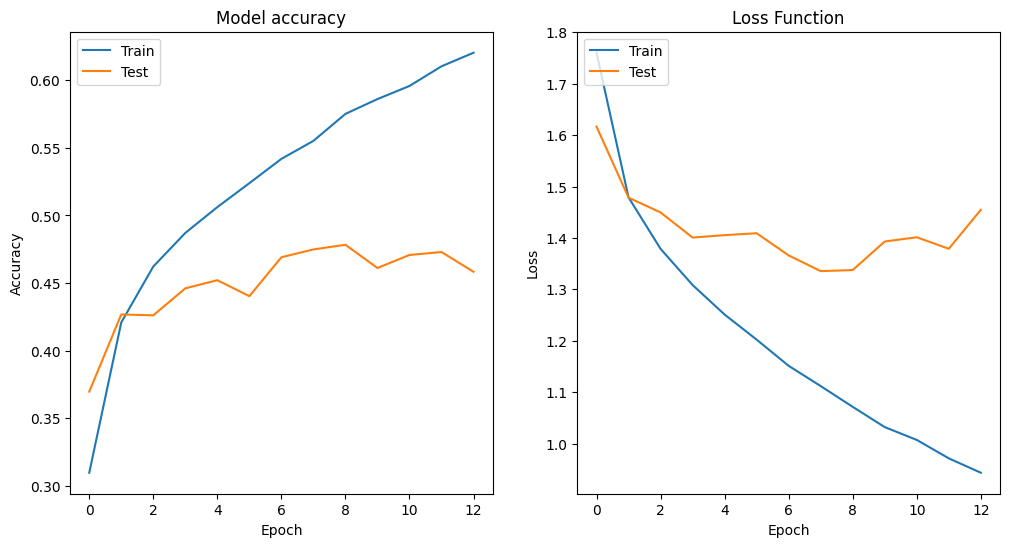

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_filterDeep_3_history.history['accuracy'])
axs[0].plot(model_filterDeep_3_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_filterDeep_3_history.history['loss'])
axs[1].plot(model_filterDeep_3_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_filterDeep_4 = Sequential([
    Conv2D(16, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

In [ ]:
# Compile the model
model_filterDeep_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_filterDeep_4_history = model_filterDeep_4.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 67s 113ms/step - loss: 1.7553 - accuracy: 0.3057 - val_loss: 1.5905 - val_accuracy: 0.3767
Epoch 2/30
583/583 [==============================] - 66s 112ms/step - loss: 1.5147 - accuracy: 0.4049 - val_loss: 1.4857 - val_accuracy: 0.4089
Epoch 3/30
583/583 [==============================] - 64s 110ms/step - loss: 1.4268 - accuracy: 0.4343 - val_loss: 1.4462 - val_accuracy: 0.4311
Epoch 4/30
583/583 [==============================] - 64s 110ms/step - loss: 1.3672 - accuracy: 0.4636 - val_loss: 1.4767 - val_accuracy: 0.4257
Epoch 5/30
583/583 [==============================] - 67s 114ms/step - loss: 1.3129 - accuracy: 0.4836 - val_loss: 1.4083 - val_accuracy: 0.4448
Epoch 6/30
583/583 [==============================] - 64s 111ms/step - loss: 1.2723 - accuracy: 0.4993 - val_loss: 1.3903 - val_accuracy: 0.4495
Epoch 7/30
583/583 [==============================] - 65s 111ms/step - loss: 1.2354 - accuracy: 0.5138 - val_loss: 1.3729 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_filterDeep_4.save_weights('model_filterDeep_4.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_filterDeep_4.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_4.h5'

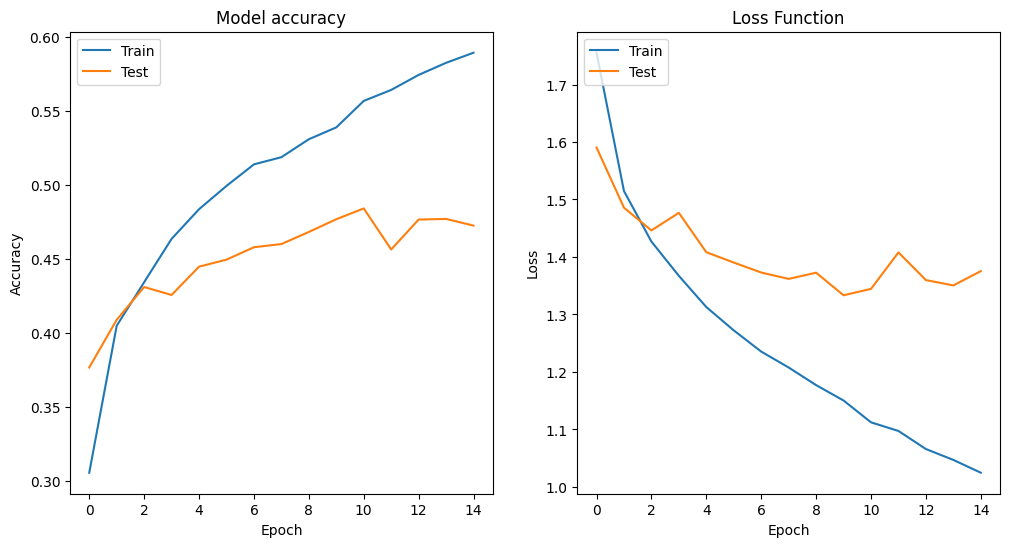

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_filterDeep_4_history.history['accuracy'])
axs[0].plot(model_filterDeep_4_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_filterDeep_4_history.history['loss'])
axs[1].plot(model_filterDeep_4_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
# Define the architecture
model_filterDeep_5 = Sequential([
    Conv2D(4, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

In [ ]:
# Compile the model
model_filterDeep_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# history object is called "model_1_history here. And model object is called "model_1"
model_filterDeep_5_history = model_filterDeep_5.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stopping])


Epoch 1/30
583/583 [==============================] - 67s 113ms/step - loss: 1.7510 - accuracy: 0.3170 - val_loss: 1.6756 - val_accuracy: 0.3486
Epoch 2/30
583/583 [==============================] - 64s 110ms/step - loss: 1.5884 - accuracy: 0.3797 - val_loss: 1.5659 - val_accuracy: 0.3945
Epoch 3/30
583/583 [==============================] - 65s 112ms/step - loss: 1.5095 - accuracy: 0.4081 - val_loss: 1.5202 - val_accuracy: 0.4023
Epoch 4/30
583/583 [==============================] - 65s 112ms/step - loss: 1.4635 - accuracy: 0.4258 - val_loss: 1.5213 - val_accuracy: 0.3922
Epoch 5/30
583/583 [==============================] - 64s 110ms/step - loss: 1.4312 - accuracy: 0.4338 - val_loss: 1.4922 - val_accuracy: 0.4173
Epoch 6/30
583/583 [==============================] - 65s 112ms/step - loss: 1.4044 - accuracy: 0.4451 - val_loss: 1.4511 - val_accuracy: 0.4276
Epoch 7/30
583/583 [==============================] - 65s 112ms/step - loss: 1.3841 - accuracy: 0.4508 - val_loss: 1.4472 - val_ac

In [ ]:
# Save weights to a HDF5 file
model_filterDeep_5.save_weights('model_filterDeep_5.h5', overwrite=True)

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Create the directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Move the weights file to the directory
shutil.move('model_filterDeep_5.h5', destination_directory)


'/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_5.h5'

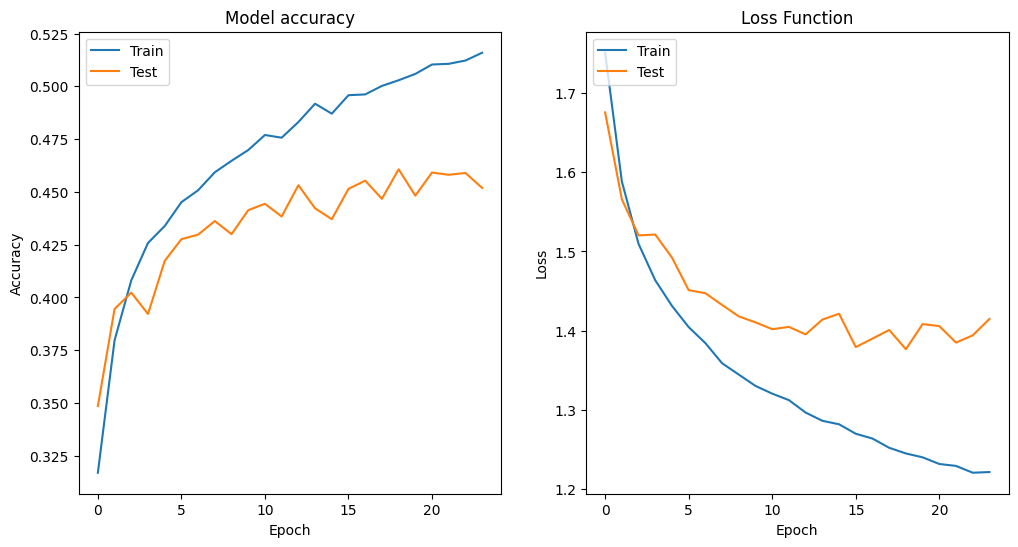

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axs[0].plot(model_filterDeep_5_history.history['accuracy'])
axs[0].plot(model_filterDeep_5_history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(model_filterDeep_5_history.history['loss'])
axs[1].plot(model_filterDeep_5_history.history['val_loss'])
axs[1].set_title('Loss Function')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

# Display the figure
plt.show()


In [ ]:
def plot_model_history(model_histories, model_names):
    for i in range(len(model_histories)):
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Plot training & validation accuracy values
        axs[0].plot(model_histories[i].history['accuracy'])
        axs[0].plot(model_histories[i].history['val_accuracy'])
        axs[0].set_title('Model accuracy - ' + model_names[i])
        axs[0].set_ylabel('Accuracy')
        axs[0].set_xlabel('Epoch')
        axs[0].legend(['Train', 'Test'], loc='upper left')

        # Plot training & validation loss values
        axs[1].plot(model_histories[i].history['loss'])
        axs[1].plot(model_histories[i].history['val_loss'])
        axs[1].set_title('Loss Function - ' + model_names[i])
        axs[1].set_ylabel('Loss')
        axs[1].set_xlabel('Epoch')
        axs[1].legend(['Train', 'Test'], loc='upper left')

        # Display the figure
        plt.show()


model_histories = [model_layerDeep_1_1history, model_layerDeep_2_history, model_layerDeep_3_history, model_layerDeep_4_history, model_layerDeep_5_history,
               model_filterDeep_1_history, model_filterDeep_2_history, model_filterDeep_3_history, model_filterDeep_4_history, model_filterDeep_5_history]

model_names = ['model_layerDeep_1', 'model_layerDeep_2', 'model_layerDeep_3', 'model_layerDeep_4','model_layerDeep_5',
               'model_filterDeep_1', 'model_filterDeep_2', 'model_filterDeep_3', 'model_filterDeep_4', 'model_filterDeep_5']

# Call the function
plot_model_history(model_histories, model_names)



In [ ]:
def save_and_move_weights(models, model_names, destination_directory):
    # Create the directory if it doesn't exist
    os.makedirs(destination_directory, exist_ok=True)

    for i in range(len(models)):
        # Save weights to a HDF5 file
        models[i].save_weights(model_names[i] + '.h5', overwrite=True)

        # Move the weights file to the directory
        shutil.move(model_names[i] + '.h5', destination_directory)

# List of models and corresponding names
models = [model_layerDeep_1, model_layerDeep_2, model_layerDeep_3, model_layerDeep_4, model_layerDeep_5,
               model_filterDeep_1, model_filterDeep_2, model_filterDeep_3, model_filterDeep_4, model_filterDeep_5]


model_names = ['model_layerDeep_1', 'model_layerDeep_2', 'model_layerDeep_3', 'model_layerDeep_4','model_layerDeep_5',
               'model_filterDeep_1', 'model_filterDeep_2', 'model_filterDeep_3', 'model_filterDeep_4', 'model_filterDeep_5']

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights'

# Call the function
save_and_move_weights(models, model_names, destination_directory)


In [ ]:
def save_models(models, model_names, destination_directory):
    # Create the directory if it doesn't exist
    os.makedirs(destination_directory, exist_ok=True)

    for i in range(len(models)):
        # Save the model to a HDF5 file
        models[i].save(destination_directory + '/' + model_names[i] + '.h5')


# List of models and corresponding names
models = [model_layerDeep_1, model_layerDeep_2, model_layerDeep_3, model_layerDeep_4, model_layerDeep_5,
               model_filterDeep_1, model_filterDeep_2, model_filterDeep_3, model_filterDeep_4, model_filterDeep_5]

model_names = ['model_layerDeep_1', 'model_layerDeep_2', 'model_layerDeep_3', 'model_layerDeep_4','model_layerDeep_5',
               'model_filterDeep_1', 'model_filterDeep_2', 'model_filterDeep_3', 'model_filterDeep_4', 'model_filterDeep_5']

# Specify your destination directory
destination_directory = '/content/drive/MyDrive/Capstone/model_weights_architecture_optimizer'


# Call the function
save_models(models, model_names, destination_directory)
